In [447]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import h5py
from tqdm import tqdm
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from scipy.optimize import root_scalar
import tarfile
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [627]:
import matplotlib.pyplot as plt

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
# Activar minor ticks por defecto
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True

# Ajustar su longitud
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['ytick.major.size'] = 6

In [ ]:
def sfrd_madau_dickinson(z):
    """Densidad de tasa de formación estelar (SFRD) en M☉ yr⁻¹ Mpc⁻³
    From eq 15 of 1403.0007
    """
    return 0.015 * (1 + z)**2.7 / (1 + ((1 + z) / 2.9)**5.6)

In [396]:
z_34 = np.array([
6.01, 5.00, 4.01, 3.49, 3.01, 2.80, 2.63, 2.46, 2.30, 2.15, 2.00, 1.86, 1.73, 1.60, 
1.48, 1.37, 1.26, 1.14, 1.05, 0.95, 0.86, 0.77, 0.69, 0.61, 0.54, 0.47, 0.40, 0.34, 
0.27, 0.21, 0.15, 0.10, 0.05, 0.00
]) # redshift para los 34 snapshots en Illustris TNG y estraido de https://camels.readthedocs.io/en/latest/description.html

z_91 = np.array([
14.99, 13.34, 11.98, 11.20, 10.48, 9.69, 9.00, 8.49, 8.01, 7.60, 7.24, 6.89, 6.56, 
6.28, 6.01, 5.75, 5.50, 5.23, 5.00, 4.80, 4.61, 4.45, 4.30, 4.15, 4.01, 3.87, 3.73, 
3.62, 3.49, 3.36, 3.24, 3.12, 3.01, 2.90, 2.80, 2.72, 2.63, 2.54, 2.46, 2.38, 2.30, 
2.22, 2.15, 2.07, 2.00, 1.93, 1.86, 1.80, 1.73, 1.67, 1.60, 1.54, 1.48, 1.43, 1.37, 
1.30, 1.26, 1.20, 1.14, 1.09, 1.05, 1.00, 0.95, 0.90, 0.86, 0.82, 0.77, 0.73, 0.69, 
0.65, 0.61, 0.58, 0.54, 0.50, 0.47, 0.43, 0.40, 0.37, 0.34, 0.30, 0.27, 0.24, 0.21, 
0.18, 0.15, 0.13, 0.10, 0.07, 0.05, 0.02, 0.00
]) # redshift para los 91 snapshots en ASTRID y estraido de https://camels.readthedocs.io/en/latest/description.html

H0 = 67.11 * u.km / u.s / u.Mpc   # Constante de Hubble

# Lookback time deseado
target_time = 2 * u.Gyr

# Función que queremos hacer cero: diferencia entre lookback time y el objetivo
def find_z(z):
    return (cosmo.lookback_time(z) - target_time).value  # en Gyr


In [6]:
params

,#Name,Omega_m,sigma_8,A_SN1,A_AGN1,A_SN2,A_AGN2,seed
0,LH_0,0.4422,0.8554,0.41928,0.73002,1.75200,1.63582,10000
1,LH_1,0.1262,0.6982,0.73204,0.73816,1.37459,0.97131,10001
2,LH_2,0.3498,0.9226,0.65702,2.71697,1.70645,2.28152,10002
3,LH_3,0.3606,0.8458,0.86694,3.03564,0.51513,0.71997,10003
4,LH_4,0.4394,0.8646,0.56723,1.31768,1.19997,1.48452,10004
...,...,...,...,...,...,...,...,...
995,LH_995,0.2462,0.7138,0.79775,0.71005,0.68444,2.22529,10995
996,LH_996,0.4718,0.8838,0.82245,0.60290,0.52159,3.63512,10996
997,LH_997,0.3670,0.9906,0.31079,2.50012,1.11806,0.39338,10997
998,LH_998,0.3998,0.6694,0.78241,0.43709,0.86995,2.18253,10998


In [477]:
halo_properties.keys()

dict_keys(['haloID:0', 'haloID:1', 'haloID:2', 'haloID:3'])

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_168844/884657096.py:2: SyntaxWarning: invalid escape sequence '\s'
  params = pd.read_csv('../data/CosmoAstroSeed_' + simu + '_L25n256_LH.txt', sep='\s+')


El redshift correspondiente a un lookback time de 2 Gyr es aproximadamente z = 0.152
7
There are 87 cluster galaxies, representing 0.41232227488151657
There are 45 backsplash galaxies, representing 0.2132701421800948
There are 22 recent infallers galaxies, representing 0.10426540284360189
There are 20 other galaxies, representing 0.0947867298578199


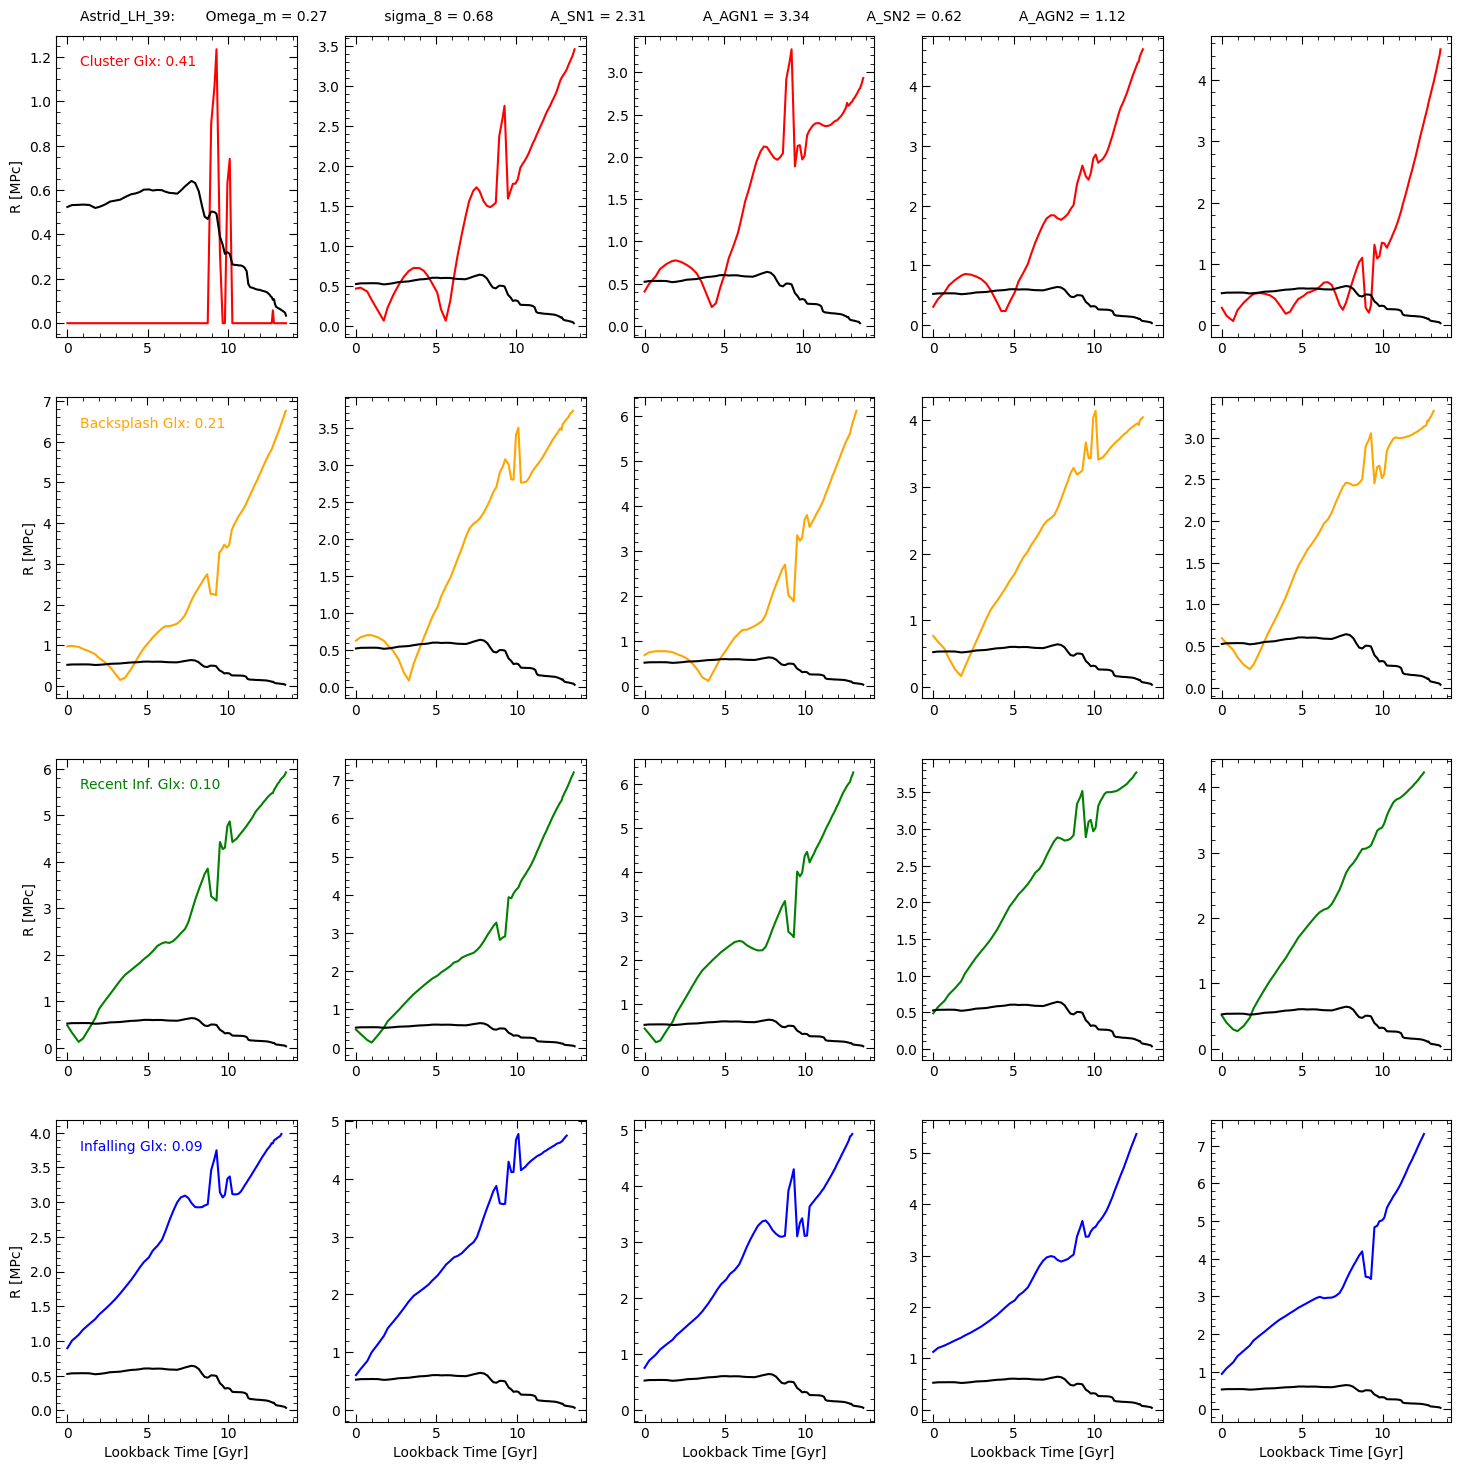

/tmp/ipykernel_168844/884657096.py:161: RuntimeWarning: divide by zero encountered in log10
  properties[i, 3, snap] = np.log10(np.array(halo_properties[haloid]['galaxies'][galid]['GasMass']))
/tmp/ipykernel_168844/884657096.py:162: RuntimeWarning: divide by zero encountered in log10
  properties[i, 4, snap] = np.log10(np.array(halo_properties[haloid]['galaxies'][galid]['StarsMass']))
/tmp/ipykernel_168844/884657096.py:163: RuntimeWarning: divide by zero encountered in log10
  properties[i, 5, snap] = np.log10(np.array(halo_properties[haloid]['galaxies'][galid]['DMMass']))
/tmp/ipykernel_168844/884657096.py:168: RuntimeWarning: divide by zero encountered in log10
  if np.log10(np.array(halo_properties[haloid]['galaxies'][galid]['DMMass']))[0] > 9:


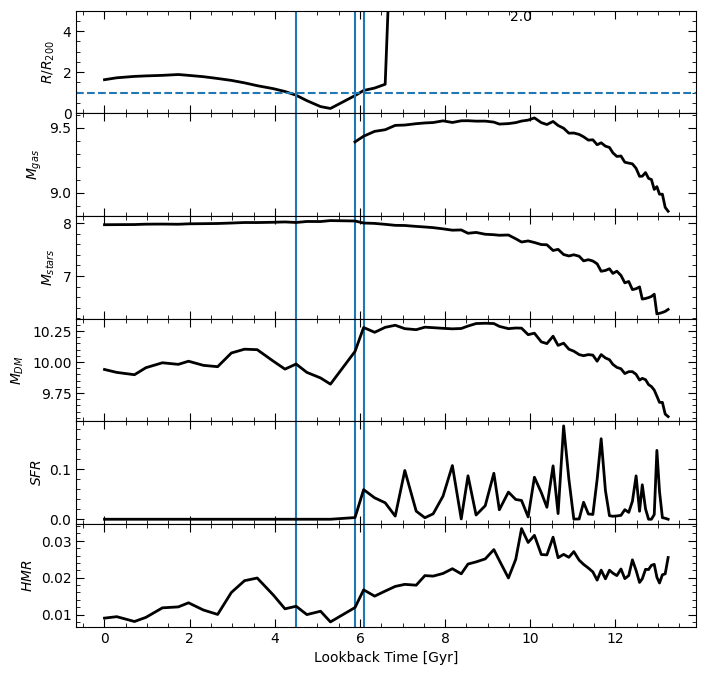

/tmp/ipykernel_168844/884657096.py:234: RuntimeWarning: Mean of empty slice
  plt.plot(z_91, np.nanmean(properties, axis = (0))[iprop,:])


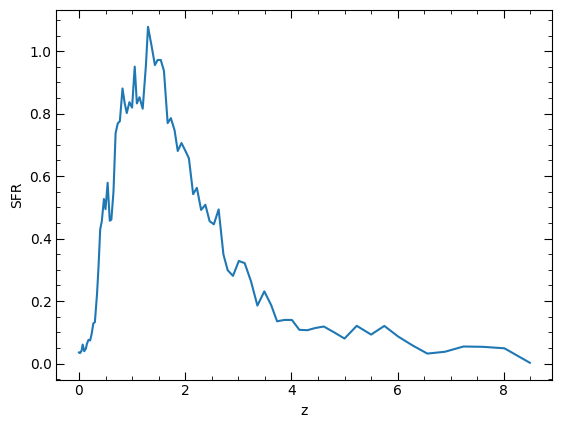

In [656]:
simu = 'Astrid' # Astrid, IllustrisTNG, SIMBA
params = pd.read_csv('../data/CosmoAstroSeed_' + simu + '_L25n256_LH.txt', sep='\s+')
# Check https://camels.readthedocs.io/en/latest/parameters.html#params for further details

isim = 39

# Definimos los parámetros cosmológicos
Om0 = params['Omega_m'][isim]           # Densidad de materia
cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)

# Buscamos el redshift z que da ese lookback time
sol = root_scalar(find_z, bracket=[0, 10])  # buscamos en el rango z=0–10

z_result = sol.root
print(f"El redshift correspondiente a un lookback time de 2 Gyr es aproximadamente z = {z_result:.3f}")

# Dependiendo la simu es el numero de snapshots
if simu in ['IllustrisTNG', 'SIMBA']:
    z = z_34
    snap_rin = 34 - np.argmin(np.abs(z_34 - z_result))
    print(snap_rin)
elif simu in ['Astrid']:
    z = z_91
    snap_rin = 91 - np.argmin(np.abs(z_91 - z_result))
    print(snap_rin)
    
lookback = cosmo.lookback_time(z)

# Ruta del archivo .tar.gz
tar_path = '../data/' + simu + ".tar.gz"

# Abre el archivo tar.gz
with tarfile.open(tar_path, "r:gz") as tar:
    # Extrae el miembro deseado como un objeto similar a un archivo
    #member = tar.getmember(tar.getnames()[0])   # nombre exacto del .pkl dentro del tar
    member = tar.getmember('Astrid_LH_' + str(isim) + '.pkl')   # nombre exacto del .pkl dentro del tar
    f = tar.extractfile(member)
    
    # Carga el objeto pickle directamente desde ese stream
    halo_properties = pickle.load(f)

orb_class_list = []

for haloid in list(halo_properties.keys()):
    orb_class = np.zeros(len(halo_properties[haloid]['galaxies'].keys())) # 1:cluster, 2: backsplash, 3: recent infaller, 4: other
    
    for i, galid in enumerate(halo_properties[haloid]['galaxies'].keys()):
        # Clasificamos cada galaxia
        orb_class[i] = -99
        try:
            dist = np.array(halo_properties[haloid]['galaxies'][galid]['dist'])
            r200 = np.array(halo_properties[haloid]['galaxies'][galid]['groupR200'])
    
            norm_dist = dist/r200 # just for simplicity
            ind_last_outside = np.where(norm_dist > 1)[0][0] # Last time the galaxy was outside
            # Backsplash
            if (norm_dist[0] > 1) & (len(np.where(norm_dist < 1)[0]) > 0): 
                orb_class[i] = 2
                first_ind_inside = np.where(norm_dist < 1)[0][0] # Primer snapshot donde esta adentro antes de ser backsplash
                first_ind_outside = np.where( norm_dist[first_ind_inside:] > 1 )[0][0] + first_ind_inside # Primer snapshot donde esta afuera antes de entrar
                if len(np.where(norm_dist[first_ind_outside:] < 1)[0]) > 0: # Esto quiere decir que estuvo adentro antes salio y volvio a entrar
                    orb_class[i] = 1
            # Other    
            elif (norm_dist[0] > 1) & (len(np.where(norm_dist < 1)[0]) == 0):
                orb_class[i] = 4
            # Cluster    
            elif (norm_dist[0] < 1) & (ind_last_outside > snap_rin):
                orb_class[i] = 1
            # Recent infaller
            elif (norm_dist[0] < 1) & (ind_last_outside < snap_rin):
                orb_class[i] = 3
                if len(np.where(norm_dist[ind_last_outside:] < 1)[0]) > 0: # Esto quiere decir que estuvo adentro antes salio y volvio a entrar
                    orb_class[i] = 1
        except:
            pass

    orb_class_list.append( orb_class )
    cl_ind = np.where(orb_class == 1)[0]
    bs_ind = np.where(orb_class == 2)[0]
    rin_ind = np.where(orb_class == 3)[0]
    ot_ind = np.where(orb_class == 4)[0]
                      
    print('There are ' + str(len(cl_ind)) + ' cluster galaxies, representing ' + str(len(cl_ind) / (len(orb_class) - 1)))
    print('There are ' + str(len(bs_ind)) + ' backsplash galaxies, representing ' + str(len(bs_ind) / (len(orb_class) - 1)))
    print('There are ' + str(len(rin_ind)) + ' recent infallers galaxies, representing ' + str(len(rin_ind) / (len(orb_class) - 1)))
    print('There are ' + str(len(ot_ind)) + ' other galaxies, representing ' + str(len(ot_ind) / (len(orb_class) - 1)))

    # Plots ---------------------------------
    firstfofid = 'galID:' + str(halo_properties[haloid]['galaxies']['FirstSubhaloInFOFGroupID'])
    snapshots_first = np.array(halo_properties[haloid]['galaxies'][firstfofid]['snap'])
    
    fig,ax = plt.subplots(4,5, figsize = (18,18))
    
    for i, ind in enumerate(np.random.choice(cl_ind, np.min((5, len(cl_ind))))):
        galid = list(halo_properties[haloid]['galaxies'].keys())[cl_ind[i]]
        snapshots = np.array(halo_properties[haloid]['galaxies'][galid]['snap'])
    
        ax[0,i].plot(lookback[snapshots], np.array(halo_properties[haloid]['galaxies'][galid]['dist']), c = 'red')
        ax[0,i].plot(lookback[snapshots_first], np.array(halo_properties[haloid]['galaxies'][firstfofid]['groupR200']), c = 'black')
    
    for i, ind in enumerate(np.random.choice(bs_ind, np.min((5, len(bs_ind))))):
        galid = list(halo_properties[haloid]['galaxies'].keys())[bs_ind[i]]
        snapshots = np.array(halo_properties[haloid]['galaxies'][galid]['snap'])
        
        ax[1,i].plot(lookback[snapshots], np.array(halo_properties[haloid]['galaxies'][galid]['dist']), c = 'orange')
        ax[1,i].plot(lookback[snapshots_first], np.array(halo_properties[haloid]['galaxies'][firstfofid]['groupR200']), c = 'black')
    
    for i, ind in enumerate(np.random.choice(rin_ind, np.min((5, len(rin_ind))))):
        galid = list(halo_properties[haloid]['galaxies'].keys())[rin_ind[i]]
        snapshots = np.array(halo_properties[haloid]['galaxies'][galid]['snap'])
        
        ax[2,i].plot(lookback[snapshots], np.array(halo_properties[haloid]['galaxies'][galid]['dist']), c = 'green')
        ax[2,i].plot(lookback[snapshots_first], np.array(halo_properties[haloid]['galaxies'][firstfofid]['groupR200']), c = 'black')
    
    for i, ind in enumerate(np.random.choice(ot_ind, np.min((5, len(ot_ind))))):
        galid = list(halo_properties[haloid]['galaxies'].keys())[ot_ind[i]]
        snapshots = np.array(halo_properties[haloid]['galaxies'][galid]['snap'])
        
        ax[3,i].plot(lookback[snapshots], np.array(halo_properties[haloid]['galaxies'][galid]['dist']), c = 'blue')
        ax[3,i].plot(lookback[snapshots_first], np.array(halo_properties[haloid]['galaxies'][firstfofid]['groupR200']), c = 'black')
    
        
    ax[3,0].set_xlabel('Lookback Time [Gyr]')
    ax[3,1].set_xlabel('Lookback Time [Gyr]')
    ax[3,2].set_xlabel('Lookback Time [Gyr]')
    ax[3,3].set_xlabel('Lookback Time [Gyr]')
    ax[3,4].set_xlabel('Lookback Time [Gyr]')
    
    ax[0,0].set_ylabel('R [MPc]')
    ax[1,0].set_ylabel('R [MPc]')
    ax[2,0].set_ylabel('R [MPc]')
    ax[3,0].set_ylabel('R [MPc]')
    
    ax[0,0].text(0.1,0.9, 'Cluster Glx: {:.2f}'.format(len(cl_ind) / (len(orb_class) - 1)), color = 'red', transform = ax[0,0].transAxes)
    ax[1,0].text(0.1,0.9, 'Backsplash Glx: {:.2f}'.format(len(bs_ind) / (len(orb_class) - 1)), color = 'orange', transform = ax[1,0].transAxes)
    ax[2,0].text(0.1,0.9, 'Recent Inf. Glx: {:.2f}'.format(len(rin_ind) / (len(orb_class) - 1)), color = 'green', transform = ax[2,0].transAxes)
    ax[3,0].text(0.1,0.9, 'Infalling Glx: {:.2f}'.format(len(ot_ind) / (len(orb_class) - 1)), color = 'blue', transform = ax[3,0].transAxes)
    
    ax[0,0].text(0.1,1.05, simu + '_LH_{}:       Omega_m = {:.2f}             sigma_8 = {:.2f}             A_SN1 = {:.2f}             A_AGN1 = {:.2f}             A_SN2 = {:.2f}             A_AGN2 = {:.2f}'.format(isim, params['Omega_m'][isim], params['sigma_8'][isim], params['A_SN1'][isim], params['A_AGN1'][isim], params['A_SN2'][isim], params['A_AGN2'][isim]), transform = ax[0,0].transAxes)
    
    plt.show()

    #plt.savefig('../graphs/' + simu + '_LH_' + str(isim) + '.pdf')

# Vamos con las propiedades
properties_list = []
for haloid in list(halo_properties.keys()):
    ngals = len(list(halo_properties[haloid]['galaxies'].keys())[2:])
    properties = np.ones((ngals, 9, 91)) * -99
    
    flag = []
    for i, galid in enumerate(list(halo_properties[haloid]['galaxies'].keys())[2:]):
        properties[i, 0, :] = int(galid[6:])
        properties[i, 2, :] = orb_class[i+2]
        try:
            snap = np.array(halo_properties[haloid]['galaxies'][galid]['snap'])
            dist = np.array(halo_properties[haloid]['galaxies'][galid]['dist'])
            r200 = np.array(halo_properties[haloid]['galaxies'][galid]['groupR200'])
    
            properties[i, 1, snap] = dist/r200
            properties[i, 3, snap] = np.log10(np.array(halo_properties[haloid]['galaxies'][galid]['GasMass']))
            properties[i, 4, snap] = np.log10(np.array(halo_properties[haloid]['galaxies'][galid]['StarsMass']))
            properties[i, 5, snap] = np.log10(np.array(halo_properties[haloid]['galaxies'][galid]['DMMass']))
            properties[i, 6, snap] = np.array(halo_properties[haloid]['galaxies'][galid]['SFR'])
            properties[i, 7, snap] = np.array(halo_properties[haloid]['galaxies'][galid]['HMR'])
            properties[i, 8, snap] = snap
    
            if np.log10(np.array(halo_properties[haloid]['galaxies'][galid]['DMMass']))[0] > 9:
                flag.append(i)
        except:
            pass
        #plt.plot(snap, sfr)
        
    #plt.xlim(0,20)
    #plt.ylim(0,1)
    properties = properties[flag] # Tiramos cosas que hayan dado mal por algo
    
    # Reemplazamos -99 por nans para hacer promedios
    ind_bad = np.where(properties == -99)
    properties[ind_bad[0][:],ind_bad[1][:],ind_bad[2][:]] = np.nan

    properties_list.append( properties )
    
# Plots ------------------------------------
igal = np.where( properties[:, 2, 0] == 2)[0][12] # Seleccionar una galaxia de ejemplt

ind_good = np.where(properties[igal,1,:] > 0)[0]

ind_inside = np.where( (properties[igal,1,:] < 1) & (properties[igal,1,:] > 0))[0]
ind_outside = np.where( (properties[igal,1,:] > 1) & (properties[igal,1,:] > 0))[0]

sign_changes = np.where(np.sign(properties[igal,1,:-1] - 1) != np.sign(properties[igal,1,1:] - 1))[0]

fig,ax = plt.subplots(6,1, gridspec_kw={'hspace': 0}, figsize = (8,8), sharex = True)

yvar = lookback[np.array(properties[igal,8,ind_good], dtype = 'int')].value

ax[0].plot(yvar, properties[igal,1,ind_good], lw = 2, color = 'black')
ax[0].axhline(y=1, ls = '--')
ax[0].set_ylim(0,5)
ax[0].set_xlabel('')
ax[0].set_ylabel('$R/R_{200}$')

if len(sign_changes) > 0:
    for i in sign_changes:
        if (properties[igal,1,i] > 0):
            xline = lookback[np.array(properties[igal,8,i], dtype = 'int')].value
            ax[0].axvline(x = xline)
            for iprop in range(5):
                ax[iprop + 1].axvline(x = xline)

ax[1].plot(yvar, properties[igal,3,ind_good], lw = 2, color = 'black')
ax[1].set_ylabel('$M_{gas}$')
    
ax[2].plot(yvar, properties[igal,4,ind_good], lw = 2, color = 'black')
ax[2].set_ylabel('$M_{stars}$')
    
ax[3].plot(yvar, properties[igal,5,ind_good], lw = 2, color = 'black')
ax[3].set_ylabel('$M_{DM}$')

ax[4].plot(yvar, properties[igal,6,ind_good], lw = 2, color = 'black')
ax[4].set_ylabel('$SFR$')

ax[5].plot(yvar, properties[igal,7,ind_good], lw = 2, color = 'black')
ax[5].set_ylabel('$HMR$')

#ax[0].set_xlabel('z')
ax[0].text(0.7,0.9, properties[igal, 2, 0], transform = ax[0].transAxes)

ax[5].set_xlabel('Lookback Time [Gyr]')
plt.show()

iprop = 6 # Seleccionar una propiedad
plt.plot(z_91, np.nanmean(properties, axis = (0))[iprop,:])
#plt.fill_between(z_91, np.nanmean(properties, axis = (0))[iprop,:] - np.nanstd(properties, axis = (0))[iprop,:], np.nanmean(properties, axis = (0))[iprop,:] + np.nanstd(properties, axis = (0))[iprop,:], alpha = 0.2)

plt.xlabel('z')
plt.ylabel('SFR')
plt.show()


In [596]:
simu = 'Astrid' # Astrid, IllustrisTNG, SIMBA

simus_dict = {}
for simu in ['Astrid', 'IllustrisTNG', 'SIMBA']:
    tar_path = '../data/' + simu + ".tar.gz"
    params = pd.read_csv('../data/CosmoAstroSeed_' + simu + '_L25n256_LH.txt', sep='\s+')
    # Check https://camels.readthedocs.io/en/latest/parameters.html#params for further details

    # Dependiendo la simu es el numero de snapshots
    if simu in ['IllustrisTNG', 'SIMBA']:
        nsnap = 34
    elif simu in ['Astrid']:
        nsnap = 91

    properties_dict = {}
    
    omega_m = []
    sigma8 = []
    a_agn1 = []
    a_agn2 = []
    a_sn1 = []
    a_sn2 = []
    
    for isim in range(100):
        try:
            # Abre el archivo tar.gz
            with tarfile.open(tar_path, "r:gz") as tar:
                # Extrae el miembro deseado como un objeto similar a un archivo
                #member = tar.getmember(tar.getnames()[0])   # nombre exacto del .pkl dentro del tar
                member = tar.getmember(simu + '_LH_' + str(isim) + '.pkl')   # nombre exacto del .pkl dentro del tar
                f = tar.extractfile(member)
                # Carga el objeto pickle directamente desde ese stream
                halo_properties = pickle.load(f)
                
            # Definimos los parámetros cosmológicos
            omega_m.append( params['Omega_m'][isim] )          # Densidad de materia
            sigma8.append( params['sigma_8'][isim] )          # Densidad de materia
            a_agn1.append( params['A_AGN1'][isim] )          # Densidad de materia
            a_agn2.append( params['A_AGN2'][isim] )          # Densidad de materia
            a_sn1.append( params['A_SN1'][isim] )          # Densidad de materia
            a_sn2.append( params['A_SN2'][isim] )          # Densidad de materia
        except:
            halo_properties = []
            print('File ' + simu + '_LH_' + str(isim) + '.pkl does not exist!')
    
        if len(halo_properties) > 0:
            for ihalo, haloid in enumerate(list(halo_properties.keys())):
                ngals = len(list(halo_properties[haloid]['galaxies'].keys())) - 1 # Le resto 1 por q esta el first subhalo 2 veces
                properties = np.ones((ngals, 9, nsnap)) * -99
                
                #print('Analizando ' + str(ngals) + ' galaxias')
                flag = []
                contador = 0 # Para contar cuantas galaxias hay
                for i, galid in enumerate(list(halo_properties[haloid]['galaxies'].keys())):
                    if galid[:3] == 'gal':
                        properties[contador, 0, :] = int(galid[6:])
                        properties[contador, 2, :] = -99
                        try:
                            snap = np.array(halo_properties[haloid]['galaxies'][galid]['snap'])
                            dist = np.array(halo_properties[haloid]['galaxies'][galid]['dist'])
                            r200 = np.array(halo_properties[haloid]['galaxies'][galid]['groupR200'])
                    
                            properties[contador, 1, snap] = dist/r200
                            properties[contador, 3, snap] = np.log10(np.array(halo_properties[haloid]['galaxies'][galid]['GasMass']))
                            properties[contador, 4, snap] = np.log10(np.array(halo_properties[haloid]['galaxies'][galid]['StarsMass']))
                            properties[contador, 5, snap] = np.log10(np.array(halo_properties[haloid]['galaxies'][galid]['DMMass']))
                            properties[contador, 6, snap] = np.array(halo_properties[haloid]['galaxies'][galid]['SFR'])
                            properties[contador, 7, snap] = np.array(halo_properties[haloid]['galaxies'][galid]['HMR'])
                            properties[contador, 8, snap] = snap
                    
                            if np.log10(np.array(halo_properties[haloid]['galaxies'][galid]['DMMass']))[0] > 9:
                                flag.append(contador)
                        except:
                            pass
                        contador += 1
                properties = properties[flag] # Tiramos cosas que hayan dado mal por algo
                
                # Reemplazamos -99 por nans para hacer promedios
                ind_bad = np.where(properties == -99)
                properties[ind_bad[0][:],ind_bad[1][:],ind_bad[2][:]] = np.nan
    
                if ihalo == 0:
                    aux_properties = properties
                else:
                    aux_properties = np.vstack((aux_properties, properties))
            properties_dict[str(isim)] = aux_properties
    
    
    omega_m = np.array(omega_m)
    sigma8 = np.array(sigma8)
    a_agn1 = np.array(a_agn1)
    a_agn2 = np.array(a_agn2)
    a_sn1 = np.array(a_sn1)
    a_sn2 = np.array(a_sn2)
    
    simu_parameters = np.vstack((omega_m, sigma8, a_agn1, a_agn2, a_sn1, a_sn2))

    simus_dict[simu] = {'params':simu_parameters, 'properties':properties_dict}

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_168844/1286511779.py:6: SyntaxWarning: invalid escape sequence '\s'
  params = pd.read_csv('../data/CosmoAstroSeed_' + simu + '_L25n256_LH.txt', sep='\s+')
/tmp/ipykernel_168844/1286511779.py:64: RuntimeWarning: divide by zero encountered in log10
  properties[contador, 3, snap] = np.log10(np.array(halo_properties[haloid]['galaxies'][galid]['GasMass']))
/tmp/ipykernel_168844/1286511779.py:65: RuntimeWarning: divide by zero encountered in log10
  properties[contador, 4, snap] = np.log10(np.array(halo_properties[haloid]['galaxies'][galid]['StarsMass']))
/tmp/ipykernel_168844/1286511779.py:66: RuntimeWarning: divide by zero encountered in log10
  properties[contador, 5, snap] = np.log10(np.array(halo_properties[haloid]['galaxies'][galid]['DMMass']))
/tmp/ipykernel_168844/1286511779.py:71: RuntimeWarning: divide by zero encountered in log10
  if np.log10(np.array(halo_properti

File Astrid_LH_1.pkl does not exist!


/tmp/ipykernel_168844/1286511779.py:63: RuntimeWarning: divide by zero encountered in divide
  properties[contador, 1, snap] = dist/r200


File Astrid_LH_8.pkl does not exist!
File Astrid_LH_11.pkl does not exist!
File Astrid_LH_16.pkl does not exist!
File Astrid_LH_18.pkl does not exist!
File Astrid_LH_23.pkl does not exist!
File Astrid_LH_29.pkl does not exist!
File Astrid_LH_38.pkl does not exist!
File Astrid_LH_44.pkl does not exist!
File Astrid_LH_50.pkl does not exist!
File Astrid_LH_53.pkl does not exist!
File Astrid_LH_54.pkl does not exist!
File Astrid_LH_55.pkl does not exist!
File Astrid_LH_59.pkl does not exist!
File Astrid_LH_60.pkl does not exist!
File Astrid_LH_62.pkl does not exist!
File Astrid_LH_67.pkl does not exist!
File Astrid_LH_68.pkl does not exist!
File Astrid_LH_70.pkl does not exist!
File Astrid_LH_71.pkl does not exist!
File Astrid_LH_72.pkl does not exist!
File Astrid_LH_73.pkl does not exist!
File Astrid_LH_76.pkl does not exist!
File Astrid_LH_80.pkl does not exist!
File Astrid_LH_83.pkl does not exist!
File Astrid_LH_89.pkl does not exist!
File Astrid_LH_91.pkl does not exist!
File Astrid_L

/tmp/ipykernel_168844/1286511779.py:64: RuntimeWarning: divide by zero encountered in log10
  properties[contador, 3, snap] = np.log10(np.array(halo_properties[haloid]['galaxies'][galid]['GasMass']))
/tmp/ipykernel_168844/1286511779.py:66: RuntimeWarning: divide by zero encountered in log10
  properties[contador, 5, snap] = np.log10(np.array(halo_properties[haloid]['galaxies'][galid]['DMMass']))
/tmp/ipykernel_168844/1286511779.py:71: RuntimeWarning: divide by zero encountered in log10
  if np.log10(np.array(halo_properties[haloid]['galaxies'][galid]['DMMass']))[0] > 9:
/tmp/ipykernel_168844/1286511779.py:65: RuntimeWarning: divide by zero encountered in log10
  properties[contador, 4, snap] = np.log10(np.array(halo_properties[haloid]['galaxies'][galid]['StarsMass']))


File IllustrisTNG_LH_3.pkl does not exist!
File IllustrisTNG_LH_14.pkl does not exist!
File IllustrisTNG_LH_17.pkl does not exist!
File IllustrisTNG_LH_18.pkl does not exist!
File IllustrisTNG_LH_20.pkl does not exist!


/tmp/ipykernel_168844/1286511779.py:63: RuntimeWarning: divide by zero encountered in divide
  properties[contador, 1, snap] = dist/r200


File IllustrisTNG_LH_30.pkl does not exist!
File IllustrisTNG_LH_40.pkl does not exist!
File IllustrisTNG_LH_43.pkl does not exist!
File IllustrisTNG_LH_45.pkl does not exist!
File IllustrisTNG_LH_51.pkl does not exist!
File IllustrisTNG_LH_55.pkl does not exist!
File IllustrisTNG_LH_56.pkl does not exist!
File IllustrisTNG_LH_57.pkl does not exist!
File IllustrisTNG_LH_62.pkl does not exist!
File IllustrisTNG_LH_73.pkl does not exist!
File IllustrisTNG_LH_75.pkl does not exist!
File IllustrisTNG_LH_80.pkl does not exist!
File IllustrisTNG_LH_82.pkl does not exist!
File IllustrisTNG_LH_84.pkl does not exist!
File IllustrisTNG_LH_88.pkl does not exist!
File IllustrisTNG_LH_89.pkl does not exist!
File IllustrisTNG_LH_94.pkl does not exist!
File IllustrisTNG_LH_98.pkl does not exist!
File SIMBA_LH_0.pkl does not exist!


/tmp/ipykernel_168844/1286511779.py:64: RuntimeWarning: divide by zero encountered in log10
  properties[contador, 3, snap] = np.log10(np.array(halo_properties[haloid]['galaxies'][galid]['GasMass']))
/tmp/ipykernel_168844/1286511779.py:66: RuntimeWarning: divide by zero encountered in log10
  properties[contador, 5, snap] = np.log10(np.array(halo_properties[haloid]['galaxies'][galid]['DMMass']))
/tmp/ipykernel_168844/1286511779.py:71: RuntimeWarning: divide by zero encountered in log10
  if np.log10(np.array(halo_properties[haloid]['galaxies'][galid]['DMMass']))[0] > 9:
/tmp/ipykernel_168844/1286511779.py:65: RuntimeWarning: divide by zero encountered in log10
  properties[contador, 4, snap] = np.log10(np.array(halo_properties[haloid]['galaxies'][galid]['StarsMass']))


File SIMBA_LH_2.pkl does not exist!
File SIMBA_LH_5.pkl does not exist!
File SIMBA_LH_6.pkl does not exist!
File SIMBA_LH_7.pkl does not exist!
File SIMBA_LH_8.pkl does not exist!
File SIMBA_LH_9.pkl does not exist!
File SIMBA_LH_15.pkl does not exist!
File SIMBA_LH_16.pkl does not exist!
File SIMBA_LH_18.pkl does not exist!
File SIMBA_LH_19.pkl does not exist!
File SIMBA_LH_20.pkl does not exist!
File SIMBA_LH_21.pkl does not exist!
File SIMBA_LH_22.pkl does not exist!
File SIMBA_LH_25.pkl does not exist!


/tmp/ipykernel_168844/1286511779.py:63: RuntimeWarning: divide by zero encountered in divide
  properties[contador, 1, snap] = dist/r200


File SIMBA_LH_29.pkl does not exist!
File SIMBA_LH_30.pkl does not exist!
File SIMBA_LH_32.pkl does not exist!
File SIMBA_LH_33.pkl does not exist!
File SIMBA_LH_36.pkl does not exist!
File SIMBA_LH_37.pkl does not exist!
File SIMBA_LH_38.pkl does not exist!
File SIMBA_LH_42.pkl does not exist!
File SIMBA_LH_43.pkl does not exist!
File SIMBA_LH_44.pkl does not exist!
File SIMBA_LH_47.pkl does not exist!
File SIMBA_LH_48.pkl does not exist!
File SIMBA_LH_54.pkl does not exist!
File SIMBA_LH_55.pkl does not exist!
File SIMBA_LH_59.pkl does not exist!
File SIMBA_LH_64.pkl does not exist!
File SIMBA_LH_66.pkl does not exist!
File SIMBA_LH_67.pkl does not exist!
File SIMBA_LH_68.pkl does not exist!
File SIMBA_LH_75.pkl does not exist!
File SIMBA_LH_76.pkl does not exist!
File SIMBA_LH_77.pkl does not exist!
File SIMBA_LH_78.pkl does not exist!
File SIMBA_LH_80.pkl does not exist!
File SIMBA_LH_81.pkl does not exist!
File SIMBA_LH_83.pkl does not exist!
File SIMBA_LH_85.pkl does not exist!
F

In [598]:
len(simus_dict['Astrid']['properties'])

71

In [599]:
len(simus_dict['IllustrisTNG']['properties'])

77

In [600]:
len(simus_dict['SIMBA']['properties'])

52

In [601]:
len(simus_dict['Astrid']['properties']['0'])

829

(array([4., 7., 5., 6., 6., 6., 5., 3., 4., 6.]),
 array([0.50243 , 0.650943, 0.799456, 0.947969, 1.096482, 1.244995,
        1.393508, 1.542021, 1.690534, 1.839047, 1.98756 ]),
 <BarContainer object of 10 artists>)

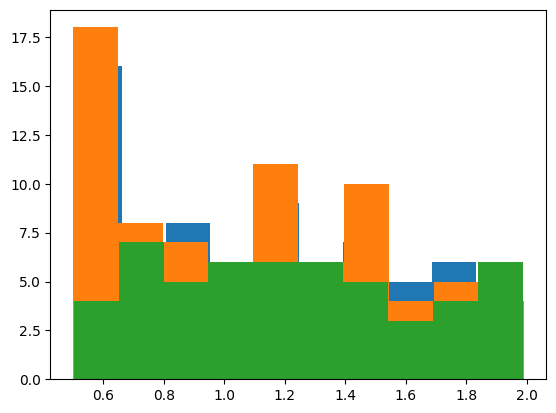

In [597]:
plt.hist(simus_dict['Astrid']['params'][5,:])
plt.hist(simus_dict['IllustrisTNG']['params'][5,:])
plt.hist(simus_dict['SIMBA']['params'][5,:])

/tmp/ipykernel_168844/3782486649.py:19: RuntimeWarning: divide by zero encountered in log10
  ax[0,isimu].plot(z, np.log10(np.nansum(simus_dict[simu]['properties'][aux_key], axis = (0))[iprop,:] / (25**3)), color = cmap(norm(var[i])))


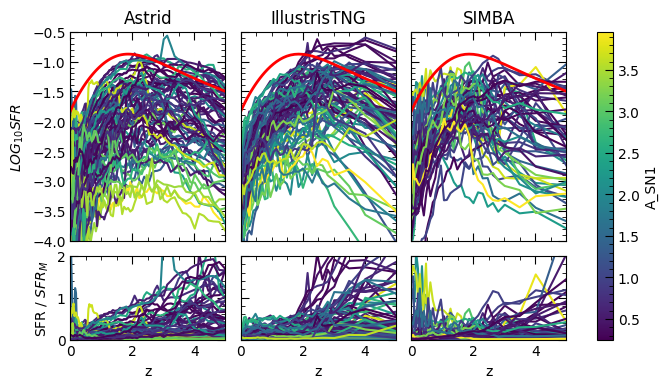

In [639]:
cmap = plt.cm.viridis
labels = ['$\\Omega_{m}$', '$\\sigma_{8}$', 'A_AGN1', 'A_AGN2', 'A_SN1', 'A_SN2']


iprop = 6 # Seleccionar una propiedad

fig,ax = plt.subplots(2,3, sharex = True, figsize = (8,4), gridspec_kw={'hspace': 0.1, 'wspace': 0.1, 'height_ratios': [2, 0.8]})

for isimu, simu in enumerate(['Astrid', 'IllustrisTNG', 'SIMBA']):
    var = simus_dict[simu]['params'][4,:]
    norm = Normalize(vmin=np.min(var), vmax=np.max(var))
    # Dependiendo la simu es el numero de snapshots
    if simu in ['IllustrisTNG', 'SIMBA']:
        z = z_34
    elif simu in ['Astrid']:
        z = z_91
    sfrd = sfrd_madau_dickinson(z)
    for i, aux_key in enumerate(list(simus_dict[simu]['properties'].keys())):
        ax[0,isimu].plot(z, np.log10(np.nansum(simus_dict[simu]['properties'][aux_key], axis = (0))[iprop,:] / (25**3)), color = cmap(norm(var[i])))
        #ax[0].plot(z, np.nanmean(simus_dict['Astrid']['properties'][aux_key], axis = (0))[iprop,:], color = cmap(norm(a_agn1[i])))
    
        ax[1,isimu].plot(z, np.nansum(simus_dict[simu]['properties'][aux_key], axis = (0))[iprop,:] / (25**3) / sfrd, color = cmap(norm(var[i])))
        
    ax[0,isimu].plot(z, np.log10(sfrd), color = 'red', lw = 2)

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # necesario para matplotlib <3.6
fig.colorbar(sm, ax = ax, label = labels[4], orientation = 'vertical')

ax[0,0].set_ylabel('$LOG_{10}SFR$')
ax[0,1].set_yticklabels([])
ax[0,2].set_yticklabels([])
ax[0,0].set_xlim(0,5)
ax[0,0].set_ylim(-4,-0.5)
ax[0,1].set_ylim(-4,-0.5)
ax[0,2].set_ylim(-4,-0.5)

ax[1,0].set_ylabel('SFR / $SFR_{M}$')
ax[1,0].set_xlabel('z')
ax[1,1].set_xlabel('z')
ax[1,2].set_xlabel('z')
ax[1,0].set_ylim(0,2)
ax[1,1].set_ylim(0,2)
ax[1,2].set_ylim(0,2)
ax[1,1].set_yticklabels([])
ax[1,2].set_yticklabels([])

ax[0,0].set_title('Astrid')
ax[0,1].set_title('IllustrisTNG')
ax[0,2].set_title('SIMBA')

plt.savefig('../graphs/SFR_' + labels[4] + '.pdf', bbox_inches = 'tight')

/tmp/ipykernel_168844/3818585698.py:18: RuntimeWarning: divide by zero encountered in log10
  ax[0,isimu].plot(z, np.log10(np.nansum(simus_dict[simu]['properties'][aux_key], axis = (0))[iprop,:]), color = cmap(norm(var[i])))
/tmp/ipykernel_168844/3818585698.py:18: RuntimeWarning: invalid value encountered in log10
  ax[0,isimu].plot(z, np.log10(np.nansum(simus_dict[simu]['properties'][aux_key], axis = (0))[iprop,:]), color = cmap(norm(var[i])))


Text(0.5, 1.0, 'SIMBA')

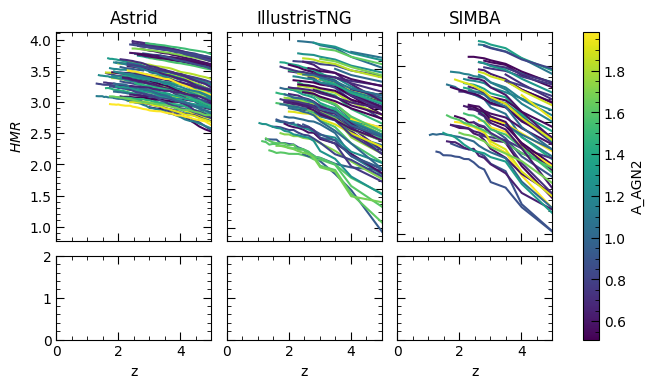

In [651]:
cmap = plt.cm.viridis
labels = ['$\\Omega_{m}$', '$\\sigma_{8}$', 'A_AGN1', 'A_AGN2', 'A_SN1', 'A_SN2']


iprop = 3 # Seleccionar una propiedad para graficar con respecto al redshift

fig,ax = plt.subplots(2,3, sharex = True, figsize = (8,4), gridspec_kw={'hspace': 0.1, 'wspace': 0.1, 'height_ratios': [2, 0.8]})

for isimu, simu in enumerate(['Astrid', 'IllustrisTNG', 'SIMBA']):
    var = simus_dict[simu]['params'][3,:] # Elegir una variable para colorear
    norm = Normalize(vmin=np.min(var), vmax=np.max(var))
    # Dependiendo la simu es el numero de snapshots
    if simu in ['IllustrisTNG', 'SIMBA']:
        z = z_34
    elif simu in ['Astrid']:
        z = z_91
    for i, aux_key in enumerate(list(simus_dict[simu]['properties'].keys())):
        ax[0,isimu].plot(z, np.log10(np.nansum(simus_dict[simu]['properties'][aux_key], axis = (0))[iprop,:]), color = cmap(norm(var[i])))

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # necesario para matplotlib <3.6
fig.colorbar(sm, ax = ax, label = labels[3], orientation = 'vertical')

ax[0,0].set_ylabel('$HMR$')
ax[0,1].set_yticklabels([])
ax[0,2].set_yticklabels([])
ax[0,0].set_xlim(0,5)
#ax[0,0].set_ylim(-4,-0.5)
#ax[0,1].set_ylim(-4,-0.5)
#ax[0,2].set_ylim(-4,-0.5)

#ax[1,0].set_ylabel('SFR / $SFR_{M}$')
ax[1,0].set_xlabel('z')
ax[1,1].set_xlabel('z')
ax[1,2].set_xlabel('z')
ax[1,0].set_ylim(0,2)
ax[1,1].set_ylim(0,2)
ax[1,2].set_ylim(0,2)
ax[1,1].set_yticklabels([])
ax[1,2].set_yticklabels([])

ax[0,0].set_title('Astrid')
ax[0,1].set_title('IllustrisTNG')
ax[0,2].set_title('SIMBA')

#plt.savefig('../graphs/HMR_' + labels[4] + '.pdf', bbox_inches = 'tight')

/tmp/ipykernel_168844/2422477434.py:9: RuntimeWarning: Mean of empty slice
  x = np.log10(np.nanmean(simus_dict[simu]['properties'][aux_key], axis = (0))[6,:])
/tmp/ipykernel_168844/2422477434.py:10: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(np.nansum(simus_dict[simu]['properties'][aux_key], axis = (0))[7,:])
/tmp/ipykernel_168844/2422477434.py:9: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(np.nanmean(simus_dict[simu]['properties'][aux_key], axis = (0))[6,:])


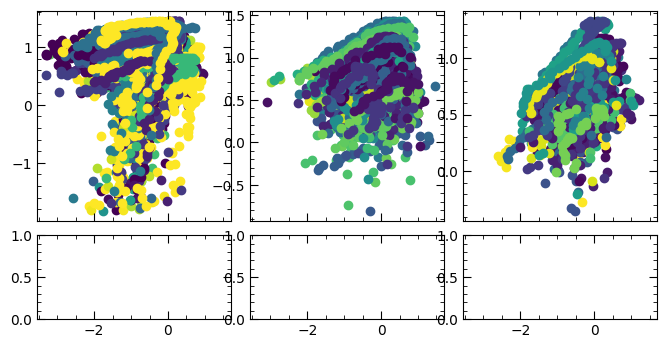

In [654]:
iprop = 3 # Seleccionar una propiedad para graficar con respecto al redshift

fig,ax = plt.subplots(2,3, sharex = True, figsize = (8,4), gridspec_kw={'hspace': 0.1, 'wspace': 0.1, 'height_ratios': [2, 0.8]})

for isimu, simu in enumerate(['Astrid', 'IllustrisTNG', 'SIMBA']):
    var = simus_dict[simu]['params'][3,:]

    for i, aux_key in enumerate(list(simus_dict[simu]['properties'].keys())):
        x = np.log10(np.nanmean(simus_dict[simu]['properties'][aux_key], axis = (0))[6,:])
        y = np.log10(np.nansum(simus_dict[simu]['properties'][aux_key], axis = (0))[7,:])
        ax[0,isimu].scatter(x, y, color = cmap(norm(var[i])))
    